## Importing Libraries and datasets

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona 
import os
import pandas as pd
import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip
from folium.plugins import GroupedLayerControl
from shapely.ops import unary_union
import zipfile
from shapely.geometry import box, Polygon, Point
from shapely.affinity import rotate, translate
import random
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [3]:
# Unzip the complete dataset
zip_path = "Data/dataset_completo.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("Data")

gpkg_path = "Data\dataset_completo.gpkg"

layers = fiona.listlayers(gpkg_path)

print("Layers in GeoPackage:")
for layer in layers:
    print(layer)

Layers in GeoPackage:
037006_Bologna-2025-03-12T15Z — lines
037006_Bologna-2025-03-12T15Z — multilinestrings
037006_Bologna-2025-03-12T15Z — multipolygons
037006_Bologna-2025-03-12T15Z — other_relations
037006_Bologna-2025-03-12T15Z — points
aree-ortive
aree-statistiche
aree-verdi_entrate_centroidi
attrezzature_ludiche_ginniche_sportive
bagni-pubblici
cammini-e-percorsi
carta-tecnica-comunale-filari-siepi
carta-tecnica-comunale-marciapiedi
carta-tecnica-comunale-percorsi-pedonali
carta-tecnica-comunale-toponimi-parchi-e-giardini
piste-ciclopedonali
popolazione-arborea
portici
rastrelliere-per-biciclette
verde_privato_urbanizzato
zona-pedonale-centro-storico
layer_styles


# EDA

## Visualize each layer

Found 22 layers.

=== Layer: 037006_Bologna-2025-03-12T15Z — lines ===
Number of features: 36734
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier', 'man_made', 'railway', 'z_order', 'other_tags', 'geometry']
Missing values per column:
osm_id            0
name          26221
highway        9361
waterway      36419
aerialway     36734
barrier       33135
man_made      36589
railway       34872
z_order           0
other_tags     6286
geometry          0
dtype: int64


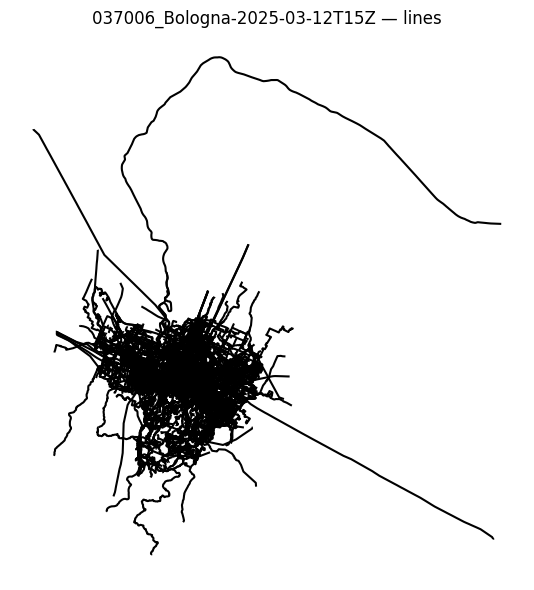



=== Layer: 037006_Bologna-2025-03-12T15Z — multilinestrings ===
Number of features: 509
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'type', 'other_tags', 'geometry']
Missing values per column:
osm_id         0
name          13
type           0
other_tags     0
geometry       0
dtype: int64


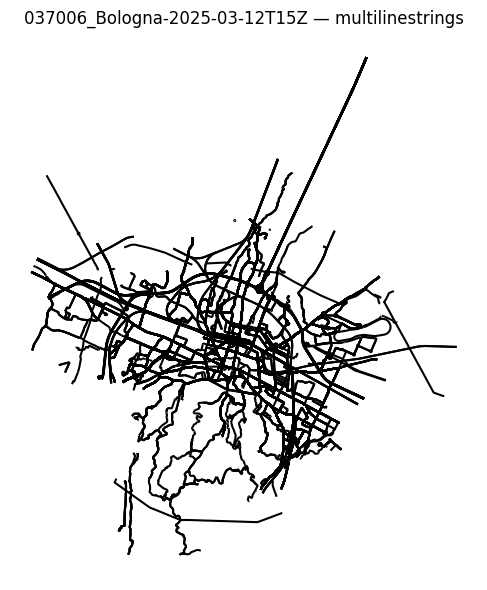



=== Layer: 037006_Bologna-2025-03-12T15Z — multipolygons ===
Number of features: 62007
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['osm_id', 'osm_way_id', 'name', 'type', 'aeroway', 'amenity', 'admin_level', 'barrier', 'boundary', 'building', 'craft', 'geological', 'historic', 'land_area', 'landuse', 'leisure', 'man_made', 'military', 'natural', 'office', 'place', 'shop', 'sport', 'tourism', 'other_tags', 'geometry']
Missing values per column:
osm_id         60561
osm_way_id      1446
name           59981
type           60557
aeroway        61946
amenity        58469
admin_level    61997
barrier        61933
boundary       61959
building       10159
craft          62007
geological     62007
historic       61922
land_area      62007
landuse        57891
leisure        60368
man_made       61878
military       62001
natural        61372
office         61969
place          61962
shop           61867
sport          61563
tourism        61949
other_tags     54470
geometry    

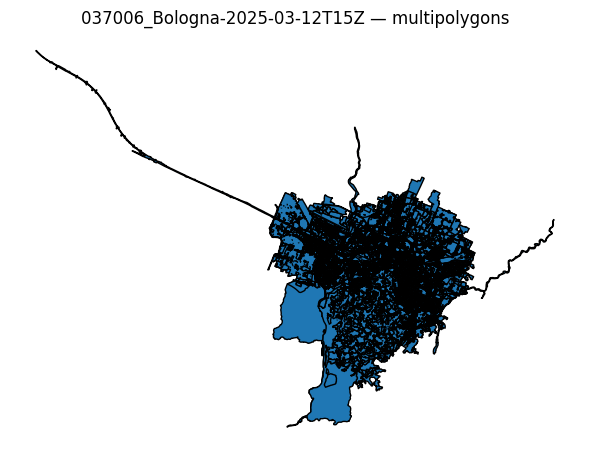



=== Layer: 037006_Bologna-2025-03-12T15Z — other_relations ===
Number of features: 1504
Geometry type: ['GeometryCollection']
CRS: None
Columns: ['osm_id', 'name', 'type', 'other_tags', 'geometry']
Missing values per column:
osm_id          0
name          803
type            0
other_tags     59
geometry        0
dtype: int64


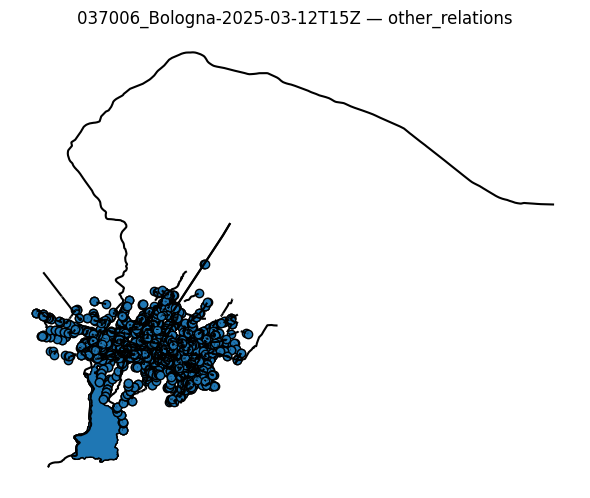



=== Layer: 037006_Bologna-2025-03-12T15Z — points ===
Number of features: 171737
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'barrier', 'highway', 'ref', 'address', 'is_in', 'place', 'man_made', 'other_tags', 'geometry']
Missing values per column:
osm_id             0
name          163759
barrier       168290
highway       164967
ref           169235
address       171737
is_in         171737
place         171638
man_made      171467
other_tags      3763
geometry           0
dtype: int64


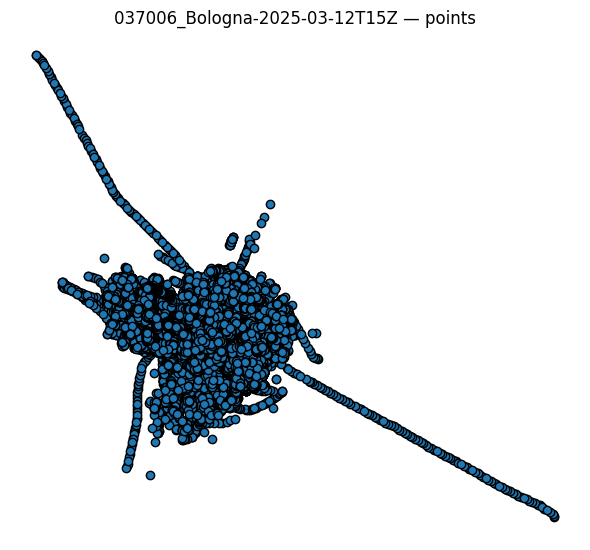



=== Layer: aree-ortive ===
Number of features: 21
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['denominazione_orto', 'indirizzo_orto', 'gestore_orto', 'indirizzo_gestore_orto', 'numero_orti', 'telefono_gestore', 'fax_gestore', 'mail_gestore', 'quartiere', 'lon', 'lat', 'nomezona', 'area_stati', 'geometry']
Missing values per column:
denominazione_orto         0
indirizzo_orto             0
gestore_orto               0
indirizzo_gestore_orto     0
numero_orti                0
telefono_gestore           6
fax_gestore               10
mail_gestore               1
quartiere                  0
lon                        0
lat                        0
nomezona                   0
area_stati                 0
geometry                   0
dtype: int64


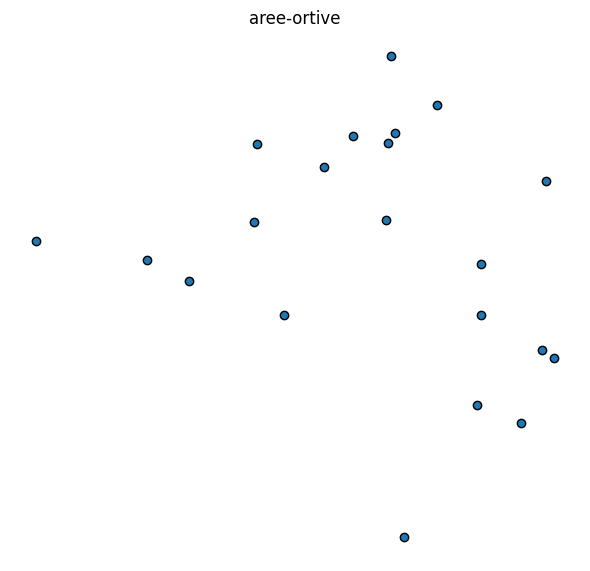



=== Layer: aree-statistiche ===
Number of features: 90
Geometry type: ['Polygon']
CRS: EPSG:4326
Columns: ['codice_area_statistica', 'geo_point_2d', 'area_statistica', 'cod_quar', 'quartiere', 'cod_zona', 'zona', 'geometry']
Missing values per column:
codice_area_statistica    0
geo_point_2d              0
area_statistica           0
cod_quar                  0
quartiere                 0
cod_zona                  0
zona                      0
geometry                  0
dtype: int64


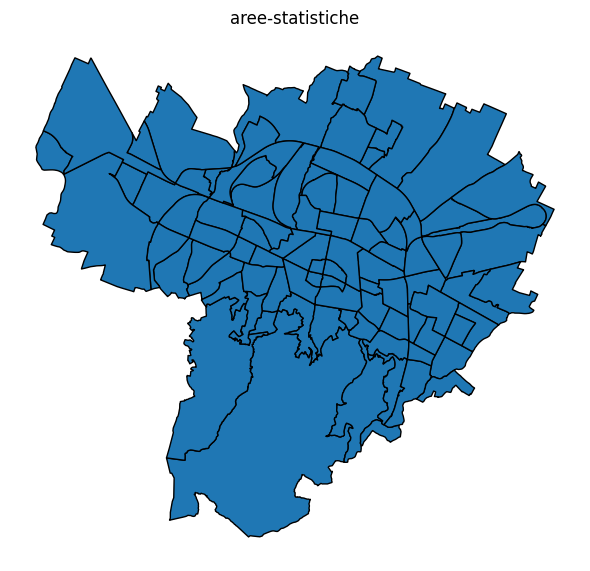



=== Layer: aree-verdi_entrate_centroidi ===
Number of features: 1200
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'tipo_di_area', 'nome', 'quartiere', 'ubicazione', 'geometry']
Missing values per column:
geo_point_2d      0
tipo_di_area    528
nome            528
quartiere       555
ubicazione      558
geometry          0
dtype: int64


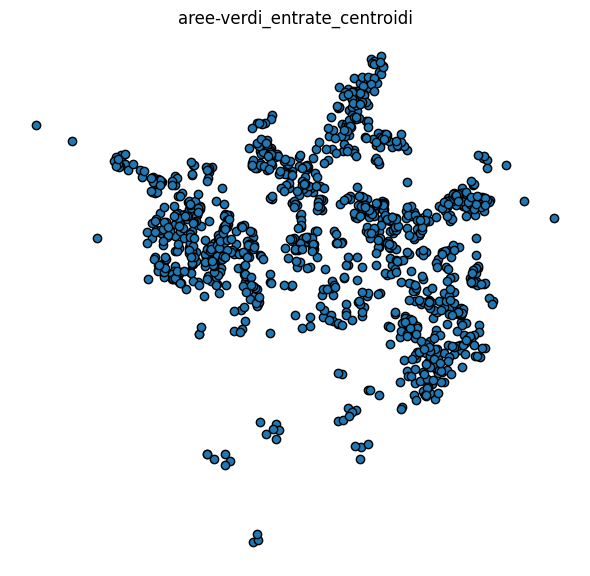



=== Layer: attrezzature_ludiche_ginniche_sportive ===
Number of features: 1414
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'categoria', 'classe', 'presenza', 'geometry']
Missing values per column:
geo_point_2d    0
categoria       1
classe          0
presenza        6
geometry        0
dtype: int64


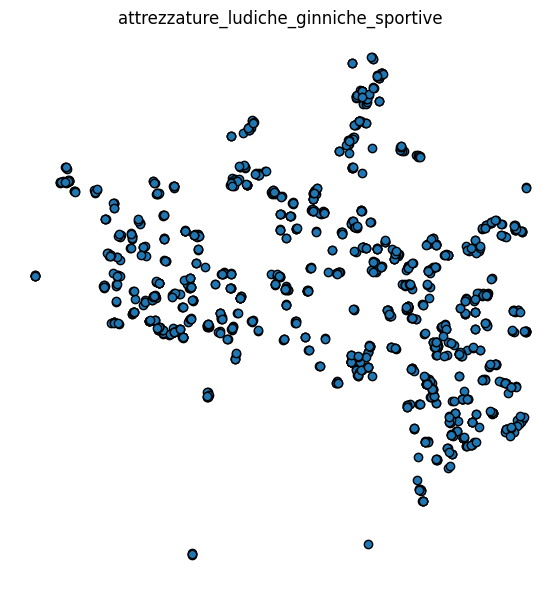



=== Layer: bagni-pubblici ===
Number of features: 30
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['tipologia', 'note', 'costo', 'posizione', 'geo_point_2d', 'descrizione', 'orari', 'accessibile', 'localizzazione', 'quartiere', 'sito_web', 'geo_id', 'sez_2011_istat', 'zona_fiu', 'area_stat', 'geometry']
Missing values per column:
tipologia          0
note              16
costo              0
posizione          0
geo_point_2d       0
descrizione        0
orari              0
accessibile        0
localizzazione     0
quartiere          0
sito_web          25
geo_id             0
sez_2011_istat     0
zona_fiu           0
area_stat          0
geometry           0
dtype: int64


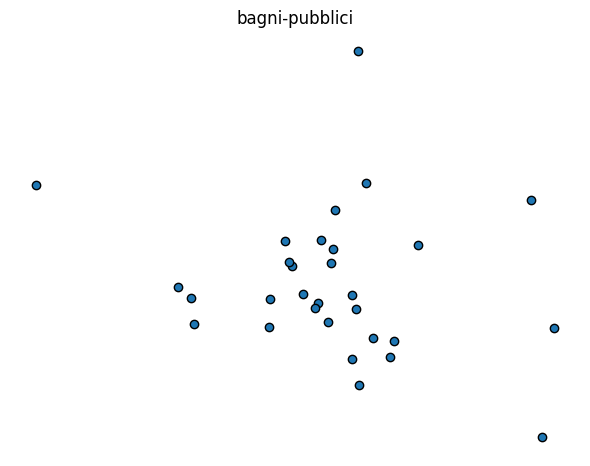



=== Layer: cammini-e-percorsi ===
Number of features: 2096
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['id', 'geo_point_2d', 'ascent', 'bicycle', 'colour', 'contact_we', 'descriptio', 'descript_1', 'descript_2', 'descript_3', 'destinatio', 'disused', 'duration', 'duration_b', 'duration_f', 'ele_from', 'ele_max', 'ele_min', 'ele_to', 'fixme', 'foot', 'from', 'from_ar', 'highway', 'name', 'name_it', 'network_ty', 'note_2', 'note_it', 'note_proje', 'operator', 'pilgrimage', 'ref_fie', 'ref_rei', 'reference', 'reg_ref', 'religion', 'roundtrip', 'sac_scale', 'source', 'symbol_it', 'to', 'tourism', 'via', 'visibility', 'website', 'wikidata', 'wikipedia', 'lunghezza', 'geometry']
Missing values per column:
id                 0
geo_point_2d       0
ascent           795
bicycle         2095
colour          2091
contact_we      2094
descriptio      1532
descript_1      2093
descript_2      1831
descript_3      2095
destinatio      2095
disused         2087
duration        2063


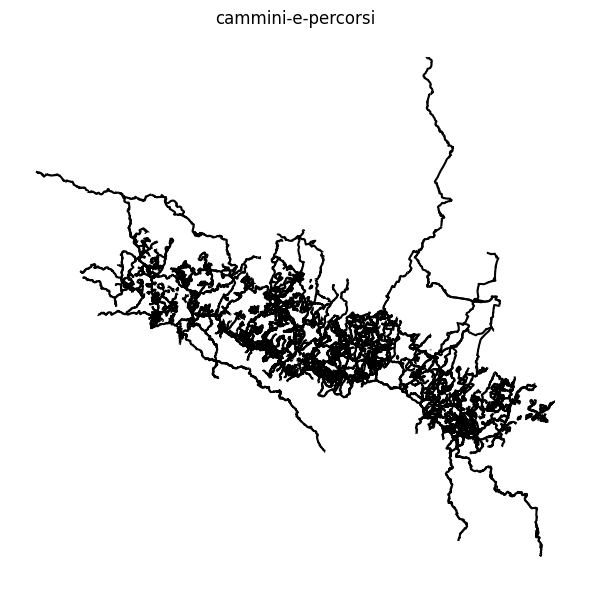



=== Layer: carta-tecnica-comunale-filari-siepi ===
Number of features: 8588
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d       0
codice_ogg         0
data_istit         0
data_varia      8502
lunghez            0
descrizion         0
origine            0
geometry           0
dtype: int64


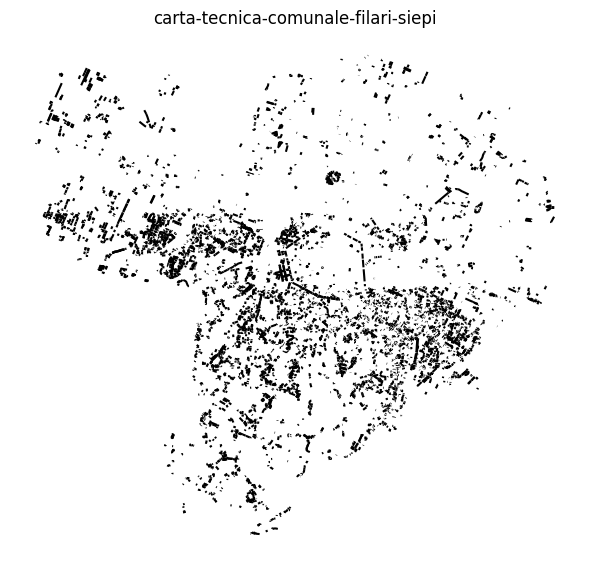



=== Layer: carta-tecnica-comunale-marciapiedi ===
Number of features: 13089
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d        0
codice_ogg          0
data_istit          0
data_varia      12274
lunghez             0
descrizion          0
origine             0
geometry            0
dtype: int64


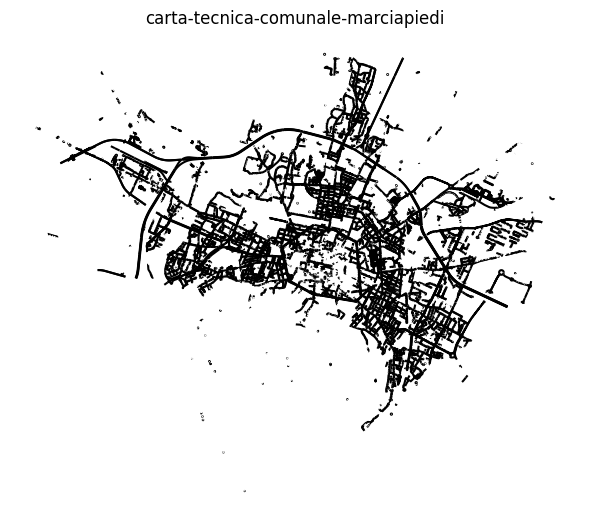



=== Layer: carta-tecnica-comunale-percorsi-pedonali ===
Number of features: 1379
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d       0
codice_ogg         0
data_istit         0
data_varia      1268
lunghez            0
descrizion         0
origine            0
geometry           0
dtype: int64


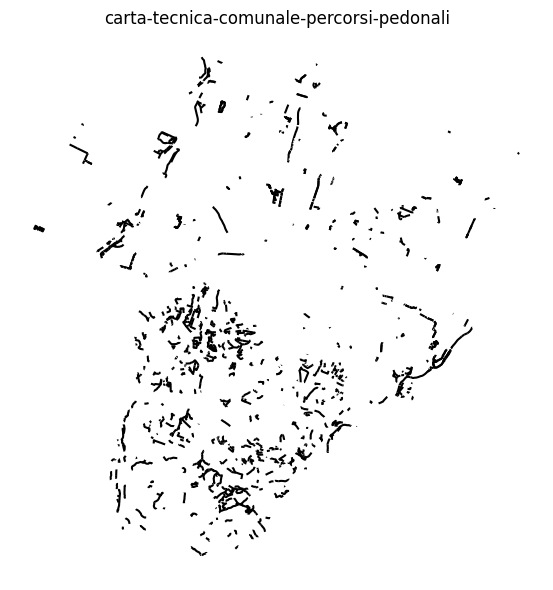



=== Layer: carta-tecnica-comunale-toponimi-parchi-e-giardini ===
Number of features: 252
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codvia', 'nomevia', 'tipo', 'geometry']
Missing values per column:
geo_point_2d    0
codvia          0
nomevia         0
tipo            0
geometry        0
dtype: int64


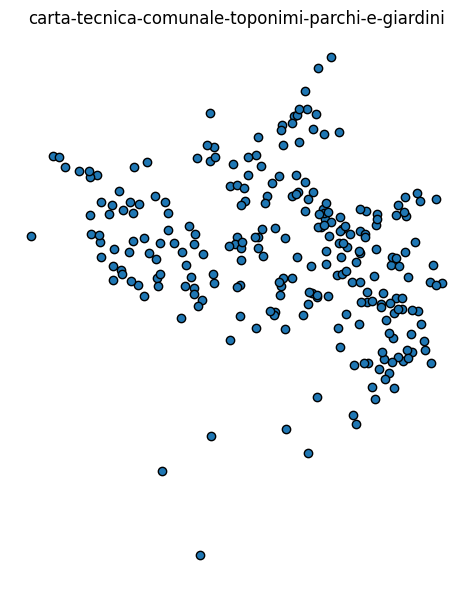



=== Layer: piste-ciclopedonali ===
Number of features: 1982
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['codice', 'anno', 'lunghezza', 'duso', 'dtipologia2', 'nomequart', 'geo_point_2d', 'zona_fiu', 'length', 'tipologia2', 'geometry']
Missing values per column:
codice           0
anno             0
lunghezza        0
duso             0
dtipologia2     22
nomequart        0
geo_point_2d     0
zona_fiu         0
length           0
tipologia2      22
geometry         0
dtype: int64


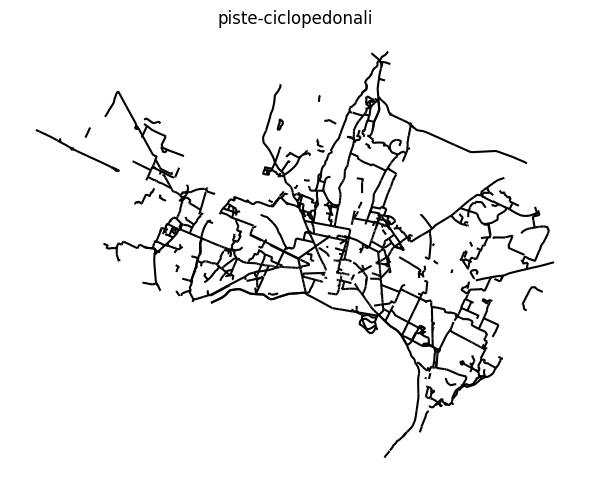



=== Layer: popolazione-arborea ===
Number of features: 9113
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'geo_shape', 'pop_area', 'classe_popolamento', 'classe_origine', 'classe_dimora', 'classe', 'data_agg', 'in_patrim', 'classe_struttura', 'classe_circonferenza_diametro', 'classe_altezza', 'geometry']
Missing values per column:
geo_point_2d                        0
geo_shape                        9113
pop_area                            0
classe_popolamento                  4
classe_origine                     15
classe_dimora                     242
classe                            109
data_agg                         1153
in_patrim                          25
classe_struttura                  101
classe_circonferenza_diametro     723
classe_altezza                     86
geometry                            0
dtype: int64


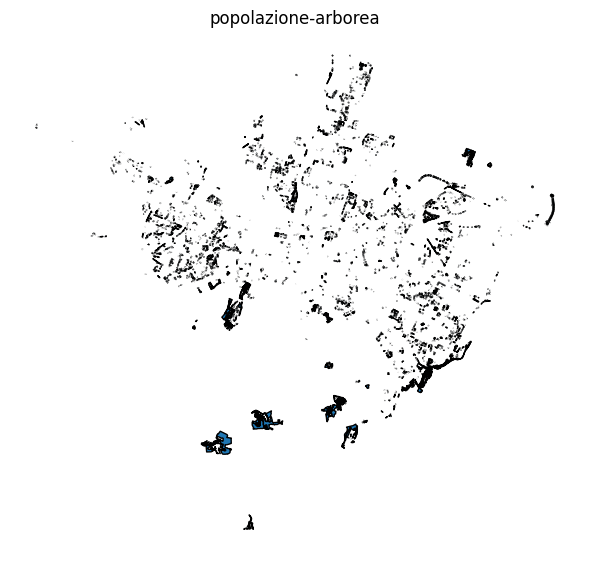



=== Layer: portici ===
Number of features: 12
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['id', 'titolo', 'testo', 'immagine_principale', 'videoguida_is', 'videoguida_lis', 'poi_id', 'url', 'coordinate', 'geometry']
Missing values per column:
id                      0
titolo                  0
testo                   0
immagine_principale     0
videoguida_is          12
videoguida_lis          0
poi_id                  0
url                     0
coordinate              0
geometry                0
dtype: int64


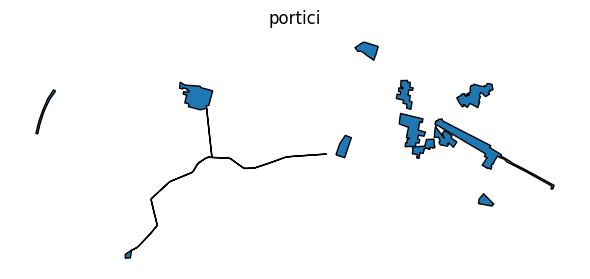



=== Layer: rastrelliere-per-biciclette ===
Number of features: 755
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'id', 'nomevia', 'civico', 'numposti', 'geometry']
Missing values per column:
geo_point_2d      0
id                0
nomevia           0
civico          162
numposti          0
geometry          0
dtype: int64


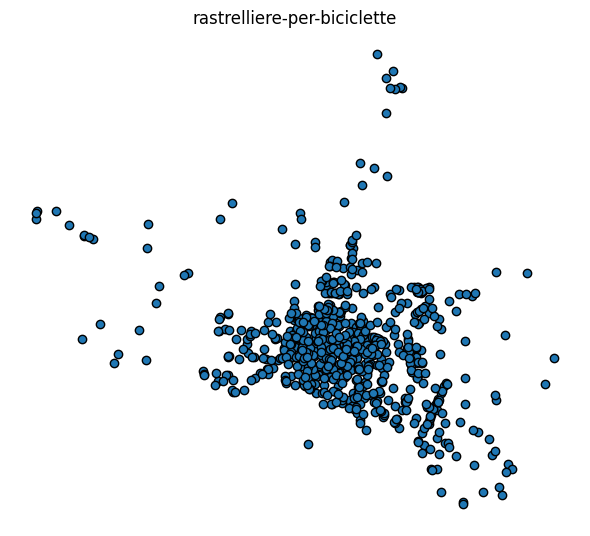



=== Layer: verde_privato_urbanizzato ===
Number of features: 25529
Geometry type: ['Polygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'centro_sto', 'quartiere', 'patrimonio', 'note', 'area_ogg', 'geometry']
Missing values per column:
geo_point_2d        0
codice_ogg          0
centro_sto          0
quartiere           0
patrimonio          0
note            23521
area_ogg            0
geometry            0
dtype: int64


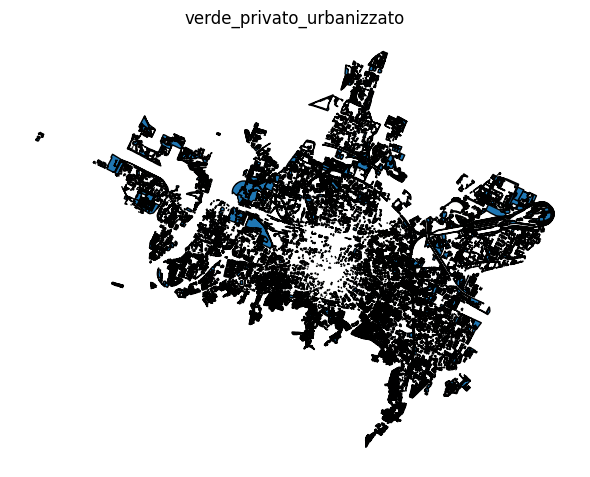



=== Layer: zona-pedonale-centro-storico ===
Number of features: 62
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'ente', 'codice', 'ordinanza', 'stato', 'area', 'codarco1', 'nomevia1', 'codarco2', 'nomevia2', 'codarco3', 'nomevia3', 'codarco4', 'nomevia4', 'codarco5', 'nomevia5', 'codarco6', 'nomevia6', 'codarco7', 'nomevia7', 'iidd', 'tipoztl', 'geometry']
Missing values per column:
geo_point_2d     0
ente            62
codice          21
ordinanza        9
stato            8
area             8
codarco1        22
nomevia1        12
codarco2        37
nomevia2        36
codarco3        41
nomevia3        41
codarco4        49
nomevia4        49
codarco5        50
nomevia5        50
codarco6        55
nomevia6        55
codarco7        57
nomevia7        57
iidd            29
tipoztl          0
geometry         0
dtype: int64


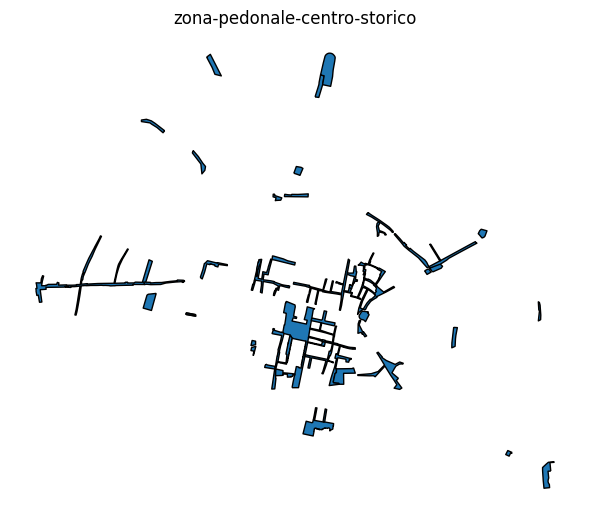



=== Layer: layer_styles ===
Non-spatial layer. Skipping plot.




In [25]:
print(f"Found {len(layers)} layers.\n")

# Loop through each layer
for layer_name in layers:
    print(f"=== Layer: {layer_name} ===")
    
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)

        # Check if it's a GeoDataFrame with geometries
        if not gdf.empty and 'geometry' in gdf.columns:
            print(f"Number of features: {len(gdf)}")
            print(f"Geometry type: {gdf.geom_type.unique()}")
            print(f"CRS: {gdf.crs}")
            print("Columns:", list(gdf.columns))
            print("Missing values per column:")
            print(gdf.isnull().sum())

            gdf.plot(figsize=(6, 6), edgecolor='black')
            plt.title(f"{layer_name}")
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            plt.close()
        else:
            print("Non-spatial layer. Skipping plot.")

        print("\n")

    except Exception as e:
        print(f"Failed to process {layer_name}: {e}")
        continue

In [26]:
summary_data = []

for layer_name in layers:
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)
        
        if 'geometry' not in gdf.columns:
            continue  # Skip non-spatial

        geom_types = gdf.geom_type.unique()
        num_features = len(gdf)
        crs = gdf.crs
        columns = list(gdf.columns)
        missing_data = gdf.isnull().mean() * 100 

        summary_data.append({
            "Layer": layer_name,
            "Geometry Types": ", ".join(geom_types),
            "Features": num_features,
            "CRS": crs.to_string() if crs else None,
            "Columns": columns,
            "Missing % (avg)": round(missing_data.mean(), 2)
        })

    except Exception as e:
        print(f"Error with layer {layer_name}: {e}")

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("Data/summary_layers.csv", index=False)
        

## Clustering

In [27]:
# Layer per cluster tematici
theme_layers = {
    "OSM base": [
        "037006_Bologna-2025-03-12T15Z — lines",
        "037006_Bologna-2025-03-12T15Z — multilinestrings",
        "037006_Bologna-2025-03-12T15Z — multipolygons",
        "037006_Bologna-2025-03-12T15Z — points",
        "037006_Bologna-2025-03-12T15Z — other_relations"
    ],
    "Mobilità": [
        "piste-ciclopedonali",
        "rastrelliere-per-biciclette",
        "cammini-e-percorsi",
        "zona-pedonale-centro-storico"
    ],
    "Aree verdi": [
        "aree-verdi_entrate_centroidi",
        "popolazione-arborea",
        "verde_privato_urbanizzato",
        "aree-ortive"
    ],
    "Servizi": [
        "bagni-pubblici",
        "attrezzature_ludiche_ginniche_sportive",
        "portici"
    ],
    "Tecnica/Toponomastica": [
        "aree-statistiche",
        "carta-tecnica-comunale-filari-siepi",
        "carta-tecnica-comunale-marciapiedi",
        "carta-tecnica-comunale-percorsi-pedonali",
        "carta-tecnica-comunale-toponimi-parchi-e-giardini"
    ]
}

all_summary = []

# Analisi per gruppo tematico
for group, layer_list in theme_layers.items():
    print(f"\nAnalisi gruppo: {group}")
    
    for layer_name in layer_list:
        try:
            gdf = gpd.read_file(gpkg_path, layer=layer_name)

            if 'geometry' not in gdf.columns:
                continue

            summary = {
                "Gruppo": group,
                "Layer": layer_name,
                "Geometria": ", ".join(gdf.geom_type.unique()),
                "CRS": gdf.crs.to_string() if gdf.crs else "None",
                "N° features": len(gdf),
                "Colonne": list(gdf.columns),
                "Missing % medio": round(gdf.isnull().mean().mean() * 100, 2)
            }
            all_summary.append(summary)

            print(f"{layer_name}: {summary['N° features']} feature, geom: {summary['Geometria']}")

        except Exception as e:
            print(f"Errore su {layer_name}: {e}")

summary_df = pd.DataFrame(all_summary)
summary_df.to_csv("Data/summary_groups.csv", index=False)



Analisi gruppo: OSM base
037006_Bologna-2025-03-12T15Z — lines: 36734 feature, geom: LineString
037006_Bologna-2025-03-12T15Z — multilinestrings: 509 feature, geom: MultiLineString
037006_Bologna-2025-03-12T15Z — multipolygons: 62007 feature, geom: MultiPolygon
037006_Bologna-2025-03-12T15Z — points: 171737 feature, geom: Point
037006_Bologna-2025-03-12T15Z — other_relations: 1504 feature, geom: GeometryCollection

Analisi gruppo: Mobilità
piste-ciclopedonali: 1982 feature, geom: MultiLineString
rastrelliere-per-biciclette: 755 feature, geom: Point
cammini-e-percorsi: 2096 feature, geom: MultiLineString
zona-pedonale-centro-storico: 62 feature, geom: MultiPolygon

Analisi gruppo: Aree verdi
aree-verdi_entrate_centroidi: 1200 feature, geom: Point
popolazione-arborea: 9113 feature, geom: MultiPolygon
verde_privato_urbanizzato: 25529 feature, geom: Polygon
aree-ortive: 21 feature, geom: Point

Analisi gruppo: Servizi
bagni-pubblici: 30 feature, geom: Point
attrezzature_ludiche_ginniche_s

## Create interactive map

In [ ]:
m = folium.Map(location=[44.4949, 11.3426], zoom_start=13, tiles=None)

layers_OSM = [
    "037006_Bologna-2025-03-12T15Z — lines",
    "037006_Bologna-2025-03-12T15Z — multilinestrings",
    "037006_Bologna-2025-03-12T15Z — multipolygons",
    "037006_Bologna-2025-03-12T15Z — points",
    "037006_Bologna-2025-03-12T15Z — other_relations"
]

layers_map = set(layers) - set(layers_OSM)

for layer_name in layers:
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)

        if gdf.empty or 'geometry' not in gdf.columns:
            continue

        # Convert datetime columns to strings to make them JSON serializable
        for col in gdf.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
            gdf[col] = gdf[col].astype(str)

        if layer_name in layers_OSM:
            folium.TileLayer('OpenStreetMap').add_to(m)
            continue

        fg = folium.FeatureGroup(name=layer_name, show=False)

        popup_fields = [col for col in gdf.columns if col != 'geometry' and not col.lower().endswith('id')]

        folium.GeoJson(
            gdf,
            name=layer_name,
            popup=folium.GeoJsonPopup(fields=popup_fields),
            tooltip=folium.GeoJsonTooltip(
                fields=popup_fields,
                aliases=[f"{f}: " for f in popup_fields],
                localize=True,
                sticky=True,
                labels=True,
                style="background-color: white; border: 1px solid black; padding: 5px;"
            )
        ).add_to(fg)

        fg.add_to(m)

    except Exception as e:
        print(f"Error with layer {layer_name}: {e}")

folium.LayerControl(collapsed=False).add_to(m)
m.save("maps/mappa_bologna_interattiva.html")

Error with layer carta-tecnica-comunale-filari-siepi: Object of type Timestamp is not JSON serializable
Error with layer carta-tecnica-comunale-marciapiedi: Object of type Timestamp is not JSON serializable
Error with layer carta-tecnica-comunale-percorsi-pedonali: Object of type Timestamp is not JSON serializable
Error with layer popolazione-arborea: Object of type Timestamp is not JSON serializable


In [ ]:
zip_path = "maps/mappa_bologna_interattiva.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write("mappa_bologna_interattiva.html", arcname="mappa_bologna_interattiva.html")


# Optimization Problem

## Restricting the working area

In [29]:
# Restricting the working area to the center of Bologna - mura
aree_statistiche = gpd.read_file(gpkg_path, layer="aree-statistiche")

working_area = aree_statistiche[
    aree_statistiche["area_statistica"].isin(["MALPIGHI-1", "IRNERIO-1", "GALVANI-1", "MARCONI-1", "MALPIGHI-2", "IRNERIO-2", "GALVANI-2", "MARCONI-2"])
].copy()

working_geom = unary_union(working_area.geometry)

working_layers = [layer for layer in fiona.listlayers(gpkg_path) 
          if layer not in ["layer_styles", "other_relations"]]

# Clip ciascun layer alla geometria di interesse
clipped_layers = {}
output_gpkg = "Data/city_center.gpkg"


for layer in working_layers:
    gdf = gpd.read_file(gpkg_path, layer=layer)

    if gdf.crs is None:
        print(f"Layer '{layer}' non ha CRS. Salto o imposto uno a mano.")
        continue  

    gdf = gdf.to_crs(working_area.crs)
    gdf = gdf[gdf.is_valid]

    try:
        gdf_clipped = gpd.clip(gdf, working_geom)
    except Exception as e:
        print(f"Errore nel clipping di {layer}: {e}")
        continue

    clipped_layers[layer] = gdf_clipped

    if not gdf_clipped.empty:
        gdf_clipped.to_file(output_gpkg, layer=layer, driver="GPKG")
    else:
        print(f"Layer '{layer}' è vuoto dopo il clip e non è stato salvato.")

Layer '037006_Bologna-2025-03-12T15Z — other_relations' non ha CRS. Salto o imposto uno a mano.
Layer 'aree-ortive' è vuoto dopo il clip e non è stato salvato.


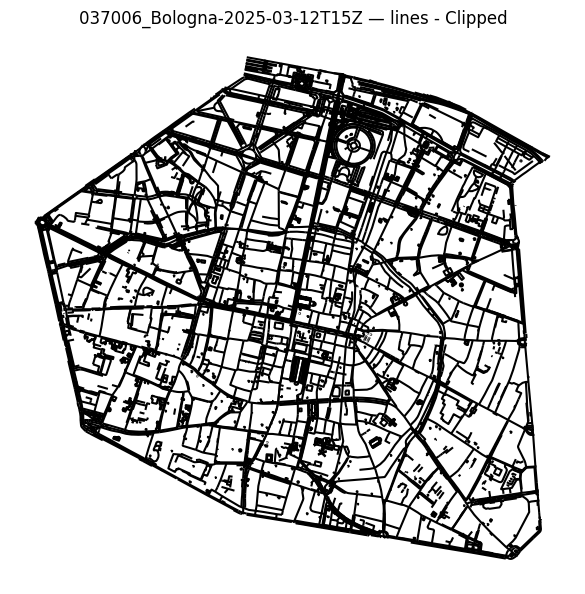

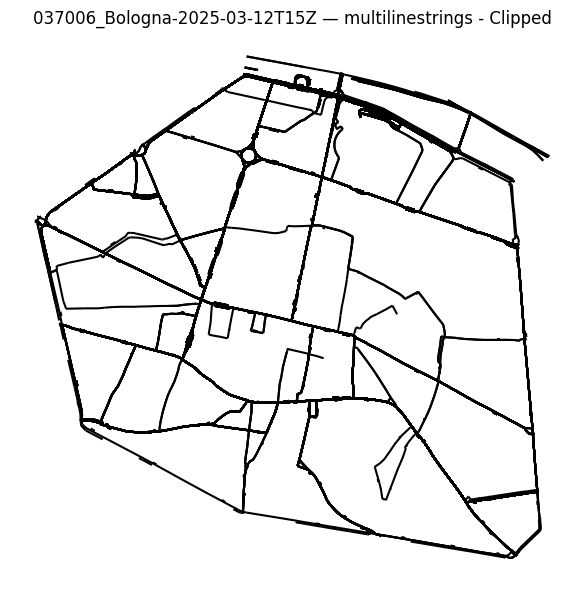

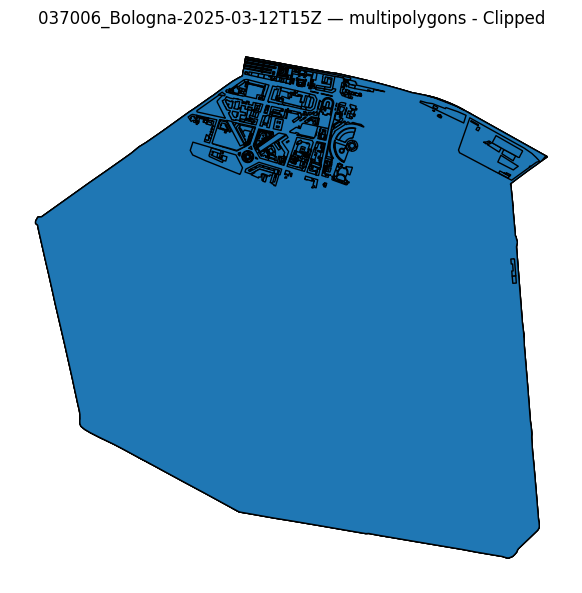

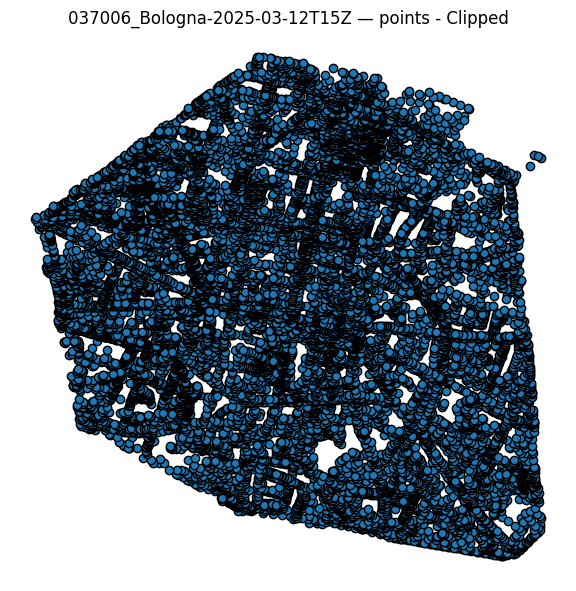

Layer 'aree-ortive' è vuoto o privo di geometrie.


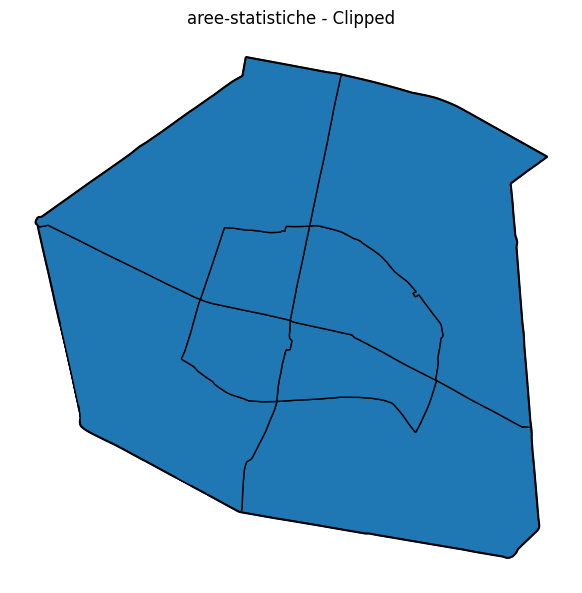

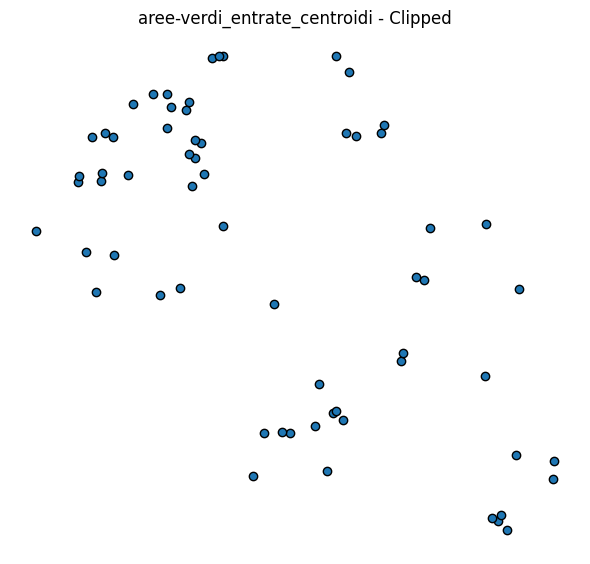

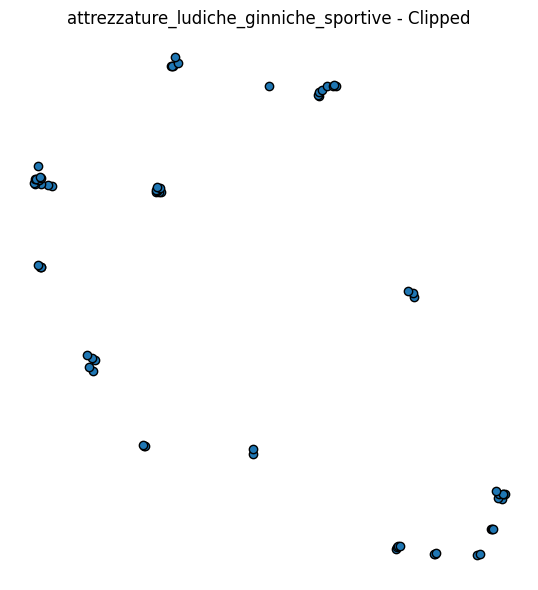

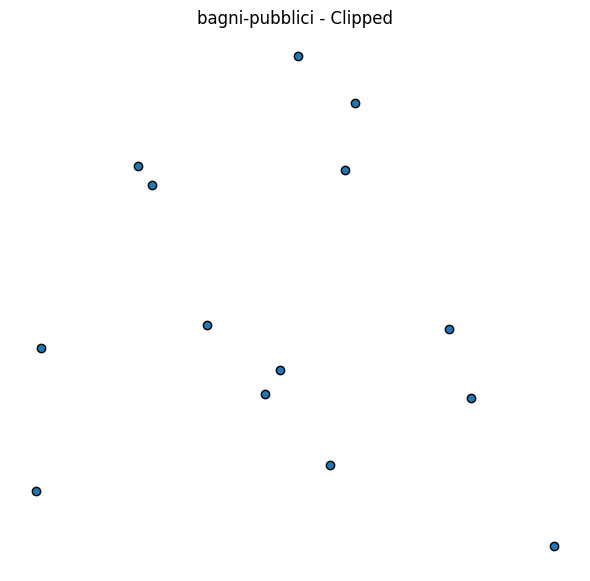

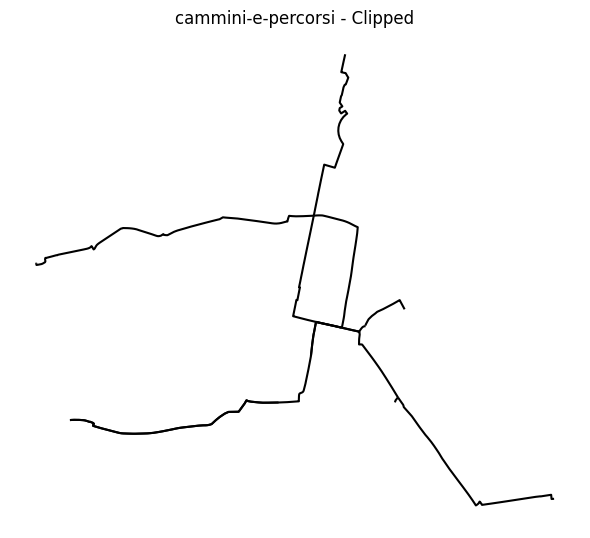

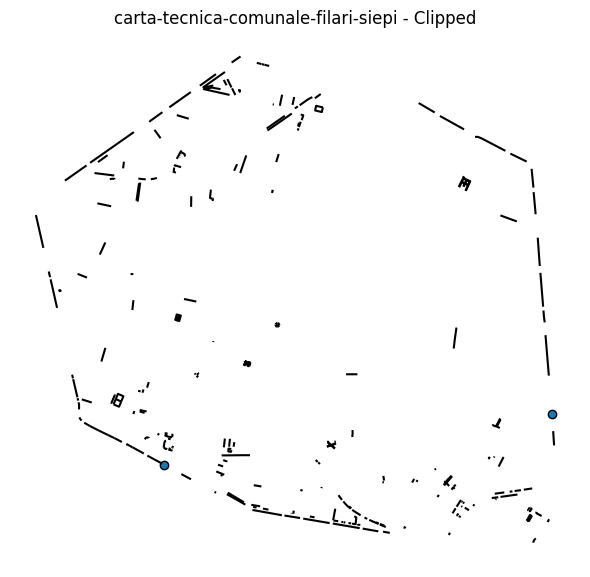

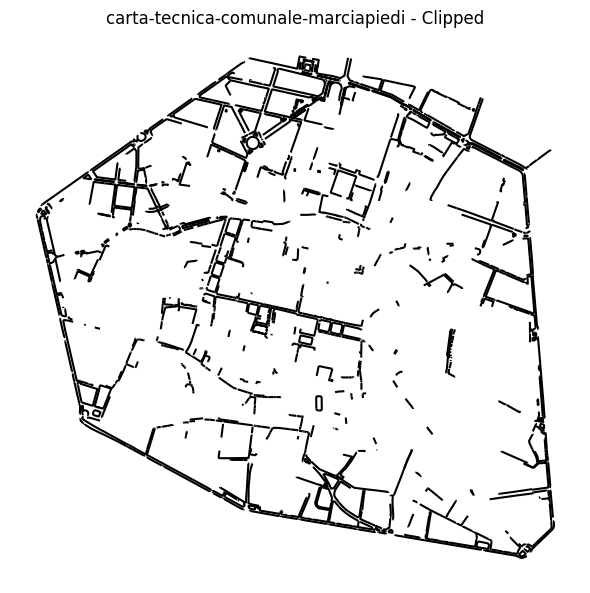

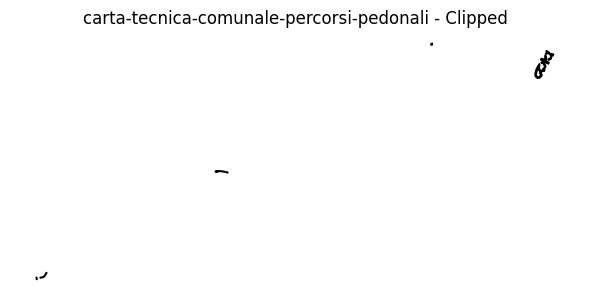

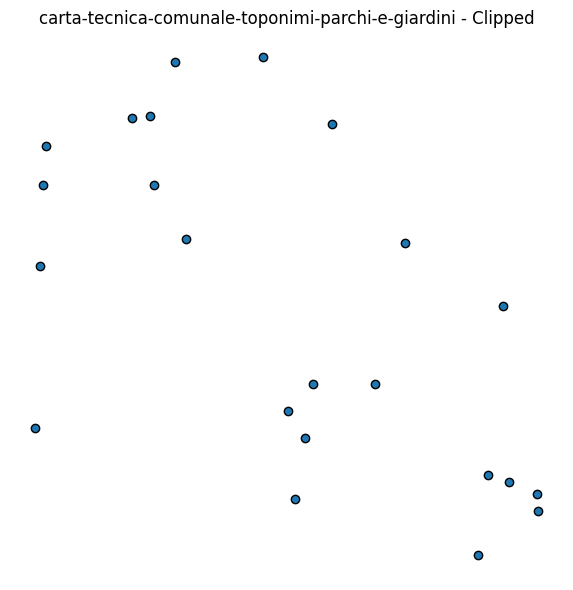

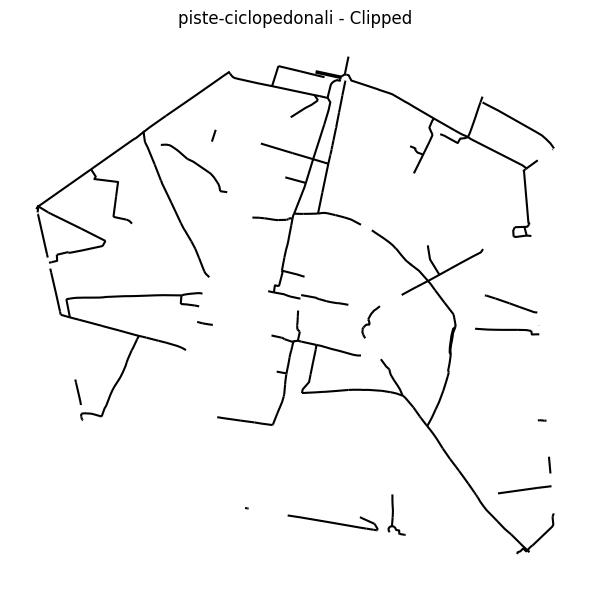

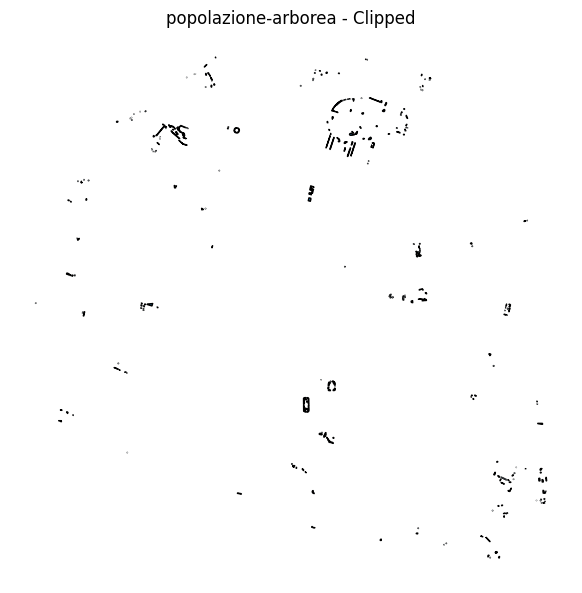

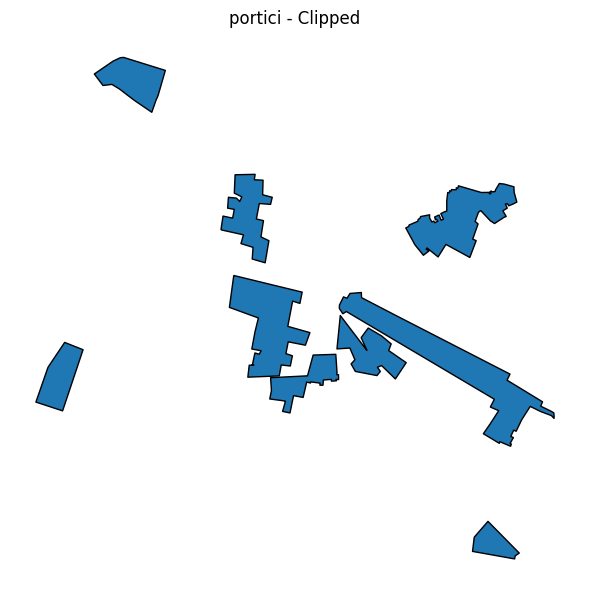

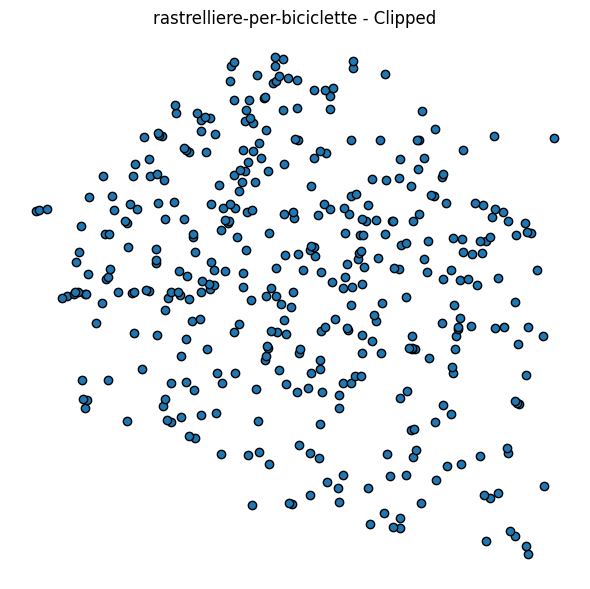

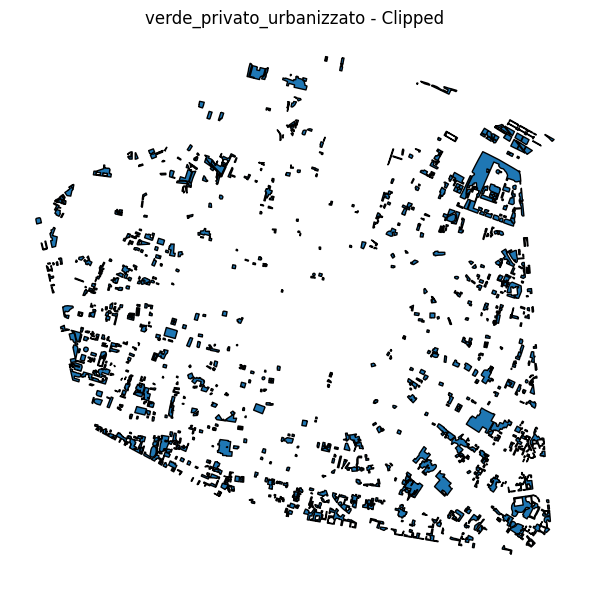

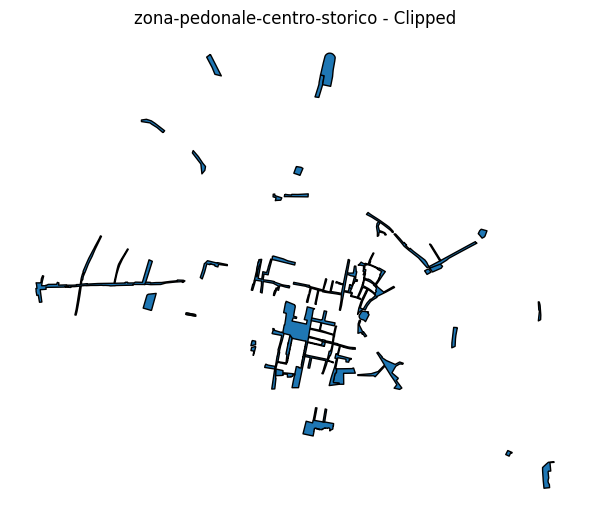

In [30]:
# Visualizza i layer clipati
for layer_name, gdf in clipped_layers.items():
    if not gdf.empty and 'geometry' in gdf.columns:
        gdf.plot(figsize=(6, 6), edgecolor='black')
        plt.title(f"{layer_name} - Clipped")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print(f"Layer '{layer_name}' è vuoto o privo di geometrie.")

## Grid Creation and Visualization

In [31]:
def crea_griglia_globale(city_center_df, cell_size=100, offset_x=0, offset_y=0, rotazione=0):
    # Bounding box originale
    minx, miny, maxx, maxy = city_center_df.total_bounds
    crs = city_center_df.crs

    # Applica offset
    minx += offset_x
    maxx += offset_x
    miny += offset_y
    maxy += offset_y

    # Centro bounding box
    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2

    # Bounding box originale come poligono
    bbox = box(minx, miny, maxx, maxy)

    # Ruota la bounding box all'indietro per trovare il bbox "allargato"
    bbox_rotated_back = rotate(bbox, angle=-rotazione, origin=(center_x, center_y), use_radians=False)

    # Prendi i nuovi limiti
    minx_rot, miny_rot, maxx_rot, maxy_rot = bbox_rotated_back.bounds

    padding = cell_size 
    # Allarga i limiti per includere le celle di griglia
    minx_rot -= padding
    maxx_rot += padding
    miny_rot -= padding
    maxy_rot += padding

    # Crea coordinate griglia sull'area "allargata"
    x_coords = np.arange(minx_rot, maxx_rot, cell_size)
    y_coords = np.arange(miny_rot, maxy_rot, cell_size)

    grid_cells = []
    for x in x_coords:
        for y in y_coords:
            grid_cells.append(box(x, y, x + cell_size, y + cell_size))

    # Ruota tutte le celle avanti di rotazione attorno al centro originale
    rotated_cells = [rotate(c, angle=rotazione, origin=(center_x, center_y), use_radians=False)
                     for c in grid_cells]

    # Crea GeoDataFrame
    grid = gpd.GeoDataFrame({'geometry': rotated_cells}, crs=crs)
    return grid

In [32]:
# CREAZIONE DELLA GRIGLIA INIZIALE DI ESEMPIO

city_center_df = gpd.read_file(output_gpkg, layer="aree-statistiche")

# Controlla il CRS
print("CRS originale:", city_center_df.crs)

# Se il CRS non è metrico (es. EPSG:4326 lat/lon), trasformalo in UTM automatico
if city_center_df.crs.is_geographic:
    utm_crs = city_center_df.estimate_utm_crs()
    city_center_df = city_center_df.to_crs(utm_crs)
    print("CRS trasformato in UTM:", city_center_df.crs)


# Imposta offset e rotazione
offset_x = 0  # Offset in metri lungo l'asse X  
offset_y = 0  # Offset in metri lungo l'asse Y
rotazione = 0  # Rotazione in gradi antiorari
cell_size = 100  # Dimensione della cella in metri

grid = crea_griglia_globale(city_center_df, cell_size, offset_x, offset_y, rotazione)

grid_size = len(grid)
print(f"Griglia creata con {grid_size} celle 100x100 m")

CRS originale: EPSG:4326
CRS trasformato in UTM: EPSG:32632
Griglia creata con 756 celle 100x100 m


CRS trasformato in UTM: EPSG:32632


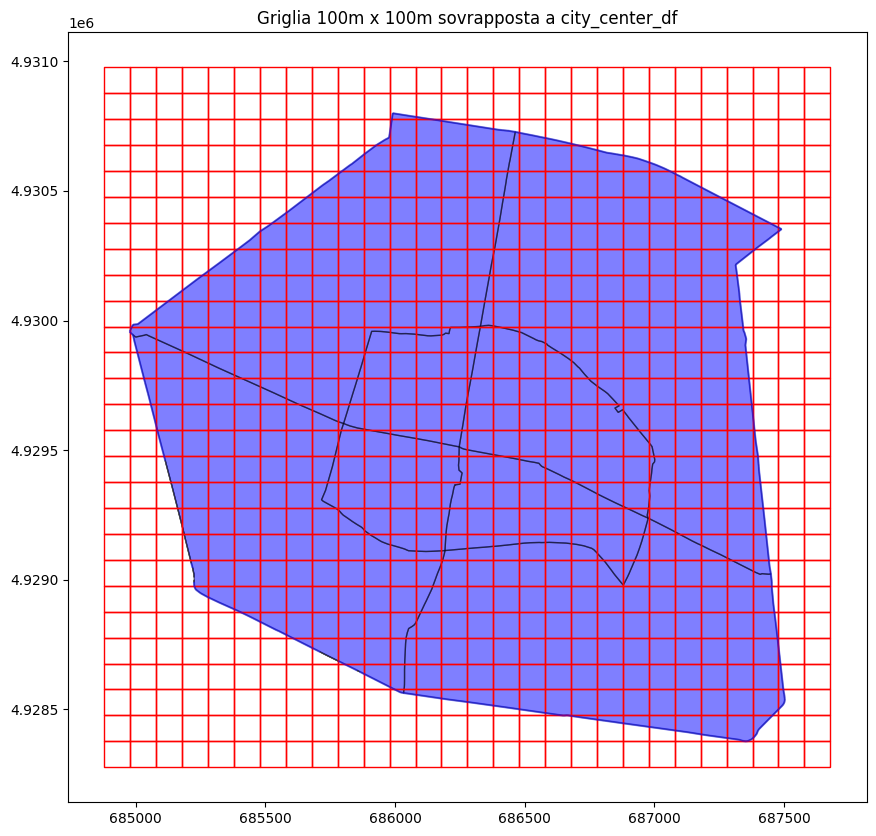

In [33]:
# Visualizza la griglia sopra il layer originale
city_center_df = gpd.read_file(output_gpkg, layer="aree-statistiche")

if city_center_df.crs.is_geographic:
    utm_crs = city_center_df.estimate_utm_crs()
    city_center_df = city_center_df.to_crs(utm_crs)
    print("CRS trasformato in UTM:", city_center_df.crs)

ax = city_center_df.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(12,10))
grid.plot(ax=ax, facecolor='none', edgecolor='red')

plt.title("Griglia 100m x 100m sovrapposta a city_center_df")
plt.show()

## Cells Analysis: coverage and scoring

### Evaluation Functions

In [ ]:
# Bonus layers sono tutti meno: "other_relations", "layer_styles" e i layer OSM
bonus_layers = [
    "piste-ciclopedonali",
    "rastrelliere-per-biciclette",
    "cammini-e-percorsi",
    "zona-pedonale-centro-storico",
    "aree-verdi_entrate_centroidi",
    "popolazione-arborea",
    "verde_privato_urbanizzato",
    "aree-ortive",
    "bagni-pubblici",
    "attrezzature_ludiche_ginniche_sportive",
    "portici"
    "carta-tecnica-comunale-filari-siepi",
    "carta-tecnica-comunale-marciapiedi",
    "carta-tecnica-comunale-percorsi-pedonali",
    "carta-tecnica-comunale-toponimi-parchi-e-giardini"
]
#############################
Bonus= {
    "alto": [
        "piste-ciclopedonali",
        "cammini-e-percorsi",
        "zona-pedonale-centro-storico",
        "portici",
        "carta-tecnica-comunale-marciapiedi",
        "carta-tecnica-comunale-percorsi-pedonali",
        "carta-tecnica-comunale-toponimi-parchi-e-giardini",
        "aree-verdi_entrate_centroidi",
    ],
    "medio": [
        "rastrelliere-per-biciclette",
        "verde_privato_urbanizzato",
        "carta-tecnica-comunale-filari-siepi",
        "aree-ortive",
        "popolazione-arborea",
    ],
    "basso": [
        "bagni-pubblici",
        "attrezzature_ludiche_ginniche_sportive",
    ],
}

bonus_weights = {
    "alto": 0.8,
    "medio": 0.5,
    "basso": 0.2
}

layer_scores = {
    layer: bonus_weights[category]
    for category, layers in Bonus.items()
    for layer in layers
}
# formato layer_scores: "piste-ciclopedonali": 0.8, "rastrelliere-per-biciclette": 0.5, ...

# Carica tutti i layer una volta sola e salvali in un dizionario
layer_gdfs = {
    name: gpd.read_file(output_gpkg, layer=name).to_crs("EPSG:32632")
    for name in layer_scores
}

results = pd.DataFrame(columns=["Box", "Copertura", "Valutazione", "Dettagli"])

In [35]:
def coverage_percentage(cell, layer, cell_size=100):
    minx, miny, maxx, maxy = cell.bounds
    
    x_coords = np.arange(minx, maxx, cell_size)
    y_coords = np.arange(miny, maxy, cell_size)
    
    cellette = [box(x, y, x + cell_size, y + cell_size) for x in x_coords for y in y_coords]
    
    grid_1m = gpd.GeoDataFrame({'geometry': cellette}, crs=layer.crs)
    
    layer_bounds = layer.total_bounds
    bbox = box(*layer_bounds)
    
    if not cell.intersects(bbox):
        return 0.0
    
    cellette_candidate = grid_1m[grid_1m.intersects(bbox)].copy()
    
    joined = gpd.sjoin(cellette_candidate, layer, how="inner", predicate='intersects')
    
    if joined.empty:
        n_intersect = 0
    else:
        n_intersect = joined['index_left'].nunique() if 'index_left' in joined.columns else joined.index.nunique()
    
    total_cellette = len(grid_1m)
    
    percent = (n_intersect / total_cellette) * 100
    
    return percent

In [36]:
# # -------------------------------- ALTERNATIVA CALCOLO COPERTURA (intersezione invece che join su sottogriglia) --------------------------------
# def coverage_percentage(cell, layer):
#     if layer.empty or not cell.intersects(layer.unary_union):
#         return 0.0

#     # Poligoni → % di area coperta
#     if layer.geom_type.iloc[0] in ['Polygon', 'MultiPolygon']:
#         inter = layer.intersection(cell)
#         area_inter = inter.area.sum()
#         return (area_inter / cell.area) * 100

#     # Linee → % di lunghezza nella cella rispetto a una lunghezza massima ipotetica
#     elif layer.geom_type.iloc[0] in ['LineString', 'MultiLineString']:
#         inter = layer.intersection(cell)
#         length_in_cell = inter.length.sum()
#         max_length = 4 * (cell.length / 2)  # per una cella quadrata = perimetro
#         return min((length_in_cell / max_length) * 100, 100)

#     # Punti → % rispetto a un numero massimo stimato di punti per cella (es. 10)
#     elif layer.geom_type.iloc[0] == 'Point':
#         n_points = layer[layer.intersects(cell)].shape[0]
#         max_points = 10
#         return min((n_points / max_points) * 100, 100)

#     else:
#         print(f"Geometria non gestita: {layer.geom_type.iloc[0]}")
#         return 0.0


In [37]:
def valuta_cella(cella, layer_scores, layer_gdfs, mostra_mappa=False):
    dettagli = []
    punteggio_totale = 0.0
    percentuale_copertura_totale = 0.0

    for layer_name, peso in layer_scores.items():
        gdf = layer_gdfs.get(layer_name)
        
        if gdf.empty:
            continue

        percentuale_copertura = coverage_percentage(cella, gdf)
        parziale = (percentuale_copertura / 100.0) * peso * 10000  # 10000 m² è l'area della cella
        dettagli.append((layer_name, percentuale_copertura, parziale))
        punteggio_totale += parziale
        percentuale_copertura_totale += percentuale_copertura
        
    if mostra_mappa and punteggio_totale > 0:
        gdf_cella = gpd.GeoDataFrame(geometry=[cella], crs="EPSG:32632")
        fig, ax = plt.subplots(figsize=(12, 12))

        color_map = {} 

        for i, layer_name in enumerate(layer_scores.keys()):
            try:
                gdf = layer_gdfs[layer_name] # Usa il dizionario pre-caricato
                if not gdf.empty:
                    color = plt.cm.tab20(i % 20)  # Colori leggibili
                    gdf.plot(ax=ax, color=color, alpha=0.4, label=layer_name)
                    color_map[layer_name] = color
            except Exception as e:
                print(f"Errore nel layer {layer_name}: {e}")
                continue

        # Plot 
        gdf_cella.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label="Cella 100x100")

        plt.title("Cella + Overlay dei Layer")
        plt.legend(loc='upper left', fontsize='small')
        plt.axis('equal')
        plt.show()

        print(f"\nPunteggio totale: {punteggio_totale:.3f}\nCopertura totale: {percentuale_copertura_totale:.1f}%\n")
        print("Dettagli per layer:")
        for nome, perc, parziale in dettagli:
            print(f"- {nome}: {perc:.1f}% coperto → punteggio {parziale:.3f}")
    
    return punteggio_totale, percentuale_copertura_totale, dettagli


### Cells Evaluation Example

In [ ]:
records = []

for cella in grid.geometry:
    punteggio, copertura, dettagli = valuta_cella(cella, layer_scores, layer_gdfs, mostra_mappa=False)
    records.append({
        "Box": cella,
        "Copertura": copertura,
        "Valutazione": punteggio,
        "Dettagli": dettagli if copertura > 0 else "Nessun layer coperto"
    })
    print(f"Cella {cella} → Punteggio: {punteggio:.3f}, Copertura: {copertura:.1f}%")

# 3. Crea un DataFrame finale
results = pd.DataFrame(records)
len_results = len(results)

Cella POLYGON ((684979.085998506 4928276.811119187, 684979.085998506 4928376.811119187, 684879.085998506 4928376.811119187, 684879.085998506 4928276.811119187, 684979.085998506 4928276.811119187)) → Punteggio: 0.000, Copertura: 0.0%
Cella POLYGON ((684979.085998506 4928376.811119187, 684979.085998506 4928476.811119187, 684879.085998506 4928476.811119187, 684879.085998506 4928376.811119187, 684979.085998506 4928376.811119187)) → Punteggio: 0.000, Copertura: 0.0%
Cella POLYGON ((684979.085998506 4928476.811119187, 684979.085998506 4928576.811119187, 684879.085998506 4928576.811119187, 684879.085998506 4928476.811119187, 684979.085998506 4928476.811119187)) → Punteggio: 0.000, Copertura: 0.0%
Cella POLYGON ((684979.085998506 4928576.811119187, 684979.085998506 4928676.811119187, 684879.085998506 4928676.811119187, 684879.085998506 4928576.811119187, 684979.085998506 4928576.811119187)) → Punteggio: 0.000, Copertura: 0.0%
Cella POLYGON ((684979.085998506 4928676.811119187, 684979.085998506

Box  Copertura  Valutazione  \
0  POLYGON ((684979.085998506 4928276.811119187, ...        0.0          0.0   
1  POLYGON ((684979.085998506 4928376.811119187, ...        0.0          0.0   
2  POLYGON ((684979.085998506 4928476.811119187, ...        0.0          0.0   
3  POLYGON ((684979.085998506 4928576.811119187, ...        0.0          0.0   
4  POLYGON ((684979.085998506 4928676.811119187, ...        0.0          0.0   

               Dettagli  
0  Nessun layer coperto  
1  Nessun layer coperto  
2  Nessun layer coperto  
3  Nessun layer coperto  
4  Nessun layer coperto


Cella selezionata (indice 611):
Box: POLYGON ((687179.085998506 4929976.811119187, 687179.085998506 4930076.811119187, 687079.085998506 4930076.811119187, 687079.085998506 4929976.811119187, 687179.085998506 4929976.811119187))
Copertura: 300.00%
Valutazione: 18000.00
Dettagli per layer coperti:
- piste ciclopedonali: 0.00% copertura → punteggio 0.00
- cammini e percorsi: 0.00% copertura → punteggio 0.00
- zona pedonale centro storico: 0.00% copertura → punteggio 0.00
- portici: 0.00% copertura → punteggio 0.00
- carta tecnica comunale marciapiedi: 100.00% copertura → punteggio 8000.00
- carta tecnica comunale percorsi pedonali: 0.00% copertura → punteggio 0.00
- carta tecnica comunale toponimi parchi e giardini: 0.00% copertura → punteggio 0.00
- aree verdi_entrate_centroidi: 0.00% copertura → punteggio 0.00
- rastrelliere per biciclette: 100.00% copertura → punteggio 5000.00
- verde_privato_urbanizzato: 100.00% copertura → punteggio 5000.00
- carta tecnica comunale filari siepi: 0.0

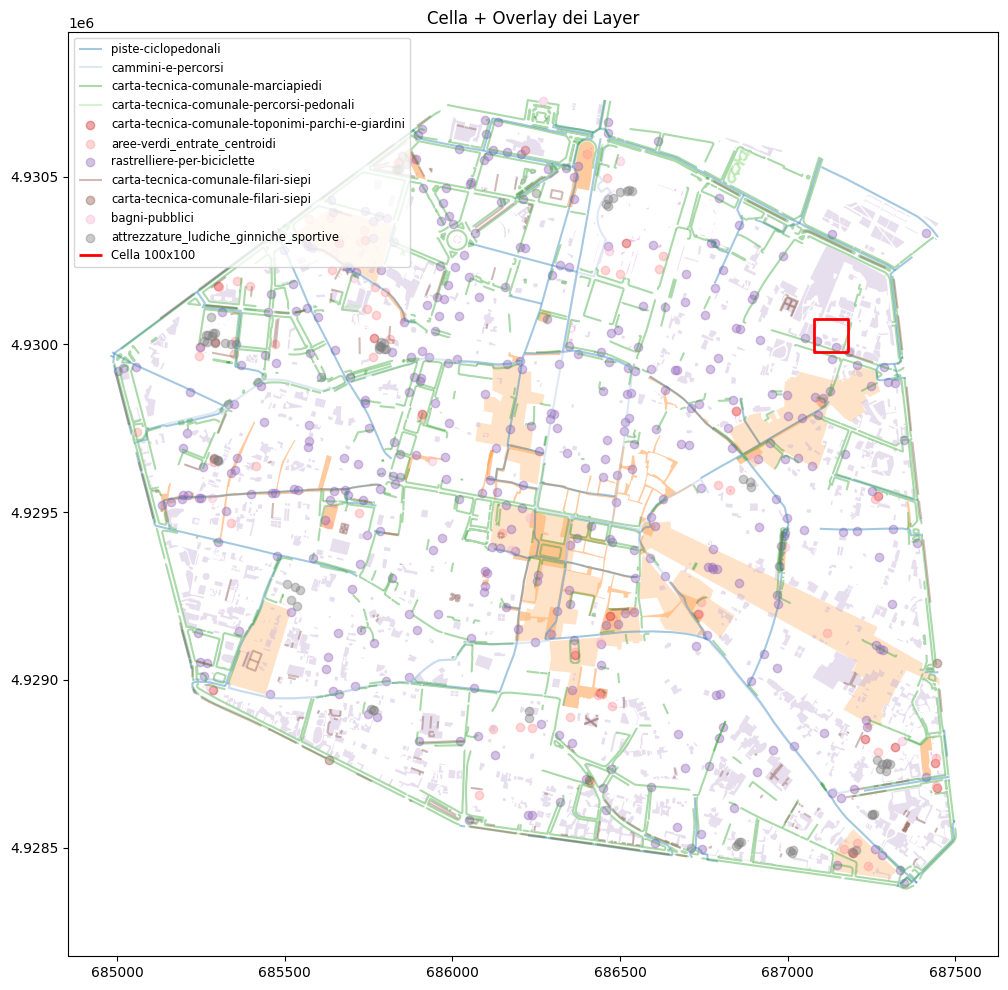

In [44]:
# Mostra 2 celle randomicamente
sample = grid.sample(1) 

for idx, row in sample.iterrows():
    box_geom = row.geometry
    match = results[results['Box'] == box_geom]

    if match.empty:
        print(f"\nCella {idx} non trovata nei risultati.")
        continue

    copertura = match['Copertura'].values[0]
    valutazione = match['Valutazione'].values[0]
    dettagli = match['Dettagli'].values[0]

    print(f"\nCella selezionata (indice {idx}):")
    print(f"Box: {box_geom}")
    print(f"Copertura: {round(copertura, 2):.2f}%")
    print(f"Valutazione: {round(valutazione, 2):.2f}")
    print("Dettagli per layer coperti:")

    if isinstance(dettagli, list):
        for nome, perc, punteggio in dettagli:
            print(f"- {nome.replace('-', ' ')}: {round(perc, 2):.2f}% copertura → punteggio {round(punteggio, 2):.2f}")
    else:
        print(f"- {dettagli}")  # Caso: "Nessun layer coperto"

    # Visualizzazione
    gdf_cella = gpd.GeoDataFrame(geometry=[box_geom], crs="EPSG:32632")
    fig, ax = plt.subplots(figsize=(12, 12))

    for i, layer_name in enumerate(layer_scores.keys()):
        try:
            gdf = gpd.read_file(output_gpkg, layer=layer_name).to_crs("EPSG:32632")
            if not gdf.empty:
                color = plt.cm.tab20(i % 20)
                gdf.plot(ax=ax, color=color, alpha=0.4, label=layer_name)
        except Exception as e:
            print(f"Errore nel layer {layer_name}: {e}")
            continue

    gdf_cella.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label="Cella 100x100")
    plt.title("Cella + Overlay dei Layer")
    plt.legend(loc='upper left', fontsize='small')
    plt.axis('equal')
    plt.show()


## First method: Grid Search

### Optimization with Grid Search

In [46]:
import numpy as np

best_score = -1
best_params = None
best_grid_gs = None

# Param ranges to explore
offset_range = np.arange(-99, 99, 20)  # from -99 to +99 meters
rotation_range = np.arange(0, 89, 30)    # from 0° to 89° in steps of 15°

for dx in offset_range:
    for dy in offset_range:
        for rot in rotation_range:
            print(f"Testing dx={dx}, dy={dy}, rot={rot}°")
            print("-" * 40)
            print()
            # Crea griglia
            grid = crea_griglia_globale(city_center_df, cell_size, offset_x=dx, offset_y=dy, rotazione=rot)
            
            # Calcola valutazioni
            grid["Valutazione"] = grid.geometry.apply(lambda cella: valuta_cella(cella, layer_scores, layer_gdfs)[0])
            total_score = grid["Valutazione"].sum()
            
            print(f"dx={dx}, dy={dy}, rot={rot}° → score={total_score:.2f}")
            
            if total_score > best_score:
                best_score = total_score
                best_params = (dx, dy, rot)
                best_grid_gs = grid.copy()


Testing dx=-99, dy=-99, rot=0°
----------------------------------------

dx=-99, dy=-99, rot=0° → score=12524000.00
Testing dx=-99, dy=-99, rot=30°
----------------------------------------

dx=-99, dy=-99, rot=30° → score=12447250.00
Testing dx=-99, dy=-99, rot=60°
----------------------------------------

dx=-99, dy=-99, rot=60° → score=12390500.00
Testing dx=-99, dy=-79, rot=0°
----------------------------------------

dx=-99, dy=-79, rot=0° → score=12386000.00
Testing dx=-99, dy=-79, rot=30°
----------------------------------------

dx=-99, dy=-79, rot=30° → score=12408250.00
Testing dx=-99, dy=-79, rot=60°
----------------------------------------

dx=-99, dy=-79, rot=60° → score=12397500.00
Testing dx=-99, dy=-59, rot=0°
----------------------------------------

dx=-99, dy=-59, rot=0° → score=12557000.00
Testing dx=-99, dy=-59, rot=30°
----------------------------------------

dx=-99, dy=-59, rot=30° → score=12489250.00
Testing dx=-99, dy=-59, rot=60°
------------------------------

### Results with Grid Search

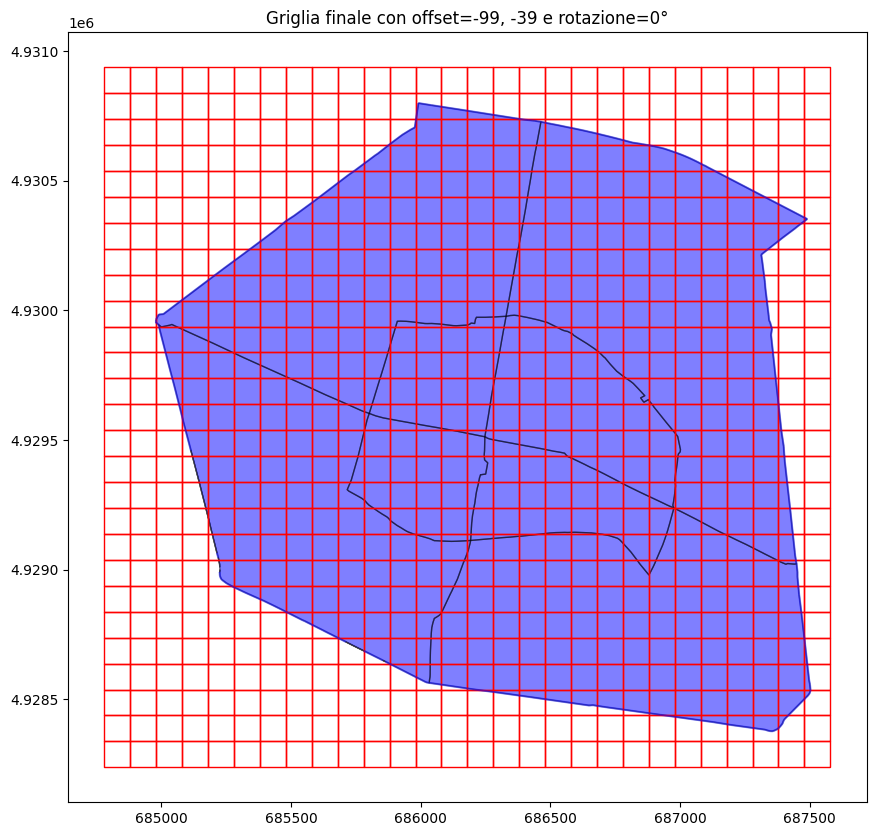

In [47]:
# Visualizza la griglia finale con i migliori parametri
ax = city_center_df.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(12,10))
best_grid_gs.plot(ax=ax, facecolor='none', edgecolor='red')
plt.title(f"Griglia finale con offset={best_params[0]}, {best_params[1]} e rotazione={best_params[2]}°")
plt.show()

In [48]:
print(f"\nMigliori parametri trovati: dx={best_params[0]}, dy={best_params[1]}, rotazione={best_params[2]}°")


Migliori parametri trovati: dx=-99, dy=-39, rotazione=0°


## Second method: Bayesian Optimization

### Optimization with Bayesian method

In [49]:
# Funzione obiettivo: ritorna -score per massimizzare
def objective(params):
    dx, dy, rot = params
    grid = crea_griglia_globale(city_center_df, cell_size=100, offset_x=dx, offset_y=dy, rotazione=rot)

    # Valutazione del punteggio per ogni cella
    grid["Valutazione"] = grid.geometry.apply(lambda cella: valuta_cella(cella, layer_scores, layer_gdfs)[0])
    total_score = grid["Valutazione"].sum()

    print(f"dx={dx}, dy={dy}, rot={rot}° → score={total_score:.2f}")

    return -total_score  # perché gp_minimize minimizza

In [50]:
best_grid_bayesian = None

# Definizione dello spazio dei parametri
search_space = [
    Integer(-99, 99),  # offset_x
    Integer(-99, 99),  # offset_y
    Integer(0, 89),     # rotazione (gradi interi)
]

# Ottimizzazione
result = gp_minimize(
    func=objective,
    dimensions=search_space,
    acq_func="EI",      # Expected Improvement
    n_calls=50,         # Numero di iterazioni
    random_state=42
)

dx=59, dy=-63, rot=69° → score=12434500.00
dx=19, dy=-11, rot=9° → score=12404500.00
dx=-8, dy=-33, rot=13° → score=12499250.00
dx=30, dy=-88, rot=64° → score=12404000.00
dx=87, dy=-99, rot=88° → score=12366250.00
dx=23, dy=22, rot=1° → score=12435000.00
dx=-94, dy=5, rot=36° → score=12418750.00
dx=-90, dy=94, rot=21° → score=12425500.00
dx=-81, dy=23, rot=34° → score=12403250.00
dx=96, dy=-7, rot=77° → score=12354500.00
dx=-77, dy=-91, rot=0° → score=12560000.00
dx=-99, dy=-99, rot=0° → score=12524000.00
dx=-59, dy=-85, rot=0° → score=12493000.00
dx=99, dy=-99, rot=0° → score=12525000.00
dx=99, dy=-93, rot=0° → score=12551000.00
dx=99, dy=-91, rot=10° → score=12398500.00
dx=92, dy=-99, rot=1° → score=12274000.00
dx=-73, dy=-15, rot=14° → score=12362500.00
dx=58, dy=-51, rot=12° → score=12292000.00
dx=-51, dy=-36, rot=14° → score=12353500.00
dx=99, dy=-2, rot=0° → score=12538000.00
dx=-76, dy=-42, rot=0° → score=12585000.00
dx=-75, dy=-82, rot=0° → score=12438000.00
dx=-77, dy=-9, rot=

### Results with Bayesian Optimization

In [51]:
# Risultato migliore
best_dx, best_dy, best_rot = result.x
best_score = -result.fun

print("\nMiglior combinazione trovata:")
print(f"Offset X: {best_dx} m")
print(f"Offset Y: {best_dy} m")
print(f"Rotazione: {best_rot}°")
print(f"Score massimo: {best_score:.2f}")

# Rigenera la griglia ottimale
best_grid_bayesian = crea_griglia_globale(city_center_df, cell_size=100, offset_x=best_dx, offset_y=best_dy, rotazione=best_rot)


Miglior combinazione trovata:
Offset X: 9 m
Offset Y: -41 m
Rotazione: 0°
Score massimo: 12647000.00


In [52]:
best_grid_bayesian["Valutazione"] = best_grid_bayesian.geometry.apply(lambda cella: valuta_cella(cella, layer_scores, layer_gdfs)[0])

## Thresholding for selecting best cells from the best grid

### Locating the best cells with both methods

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


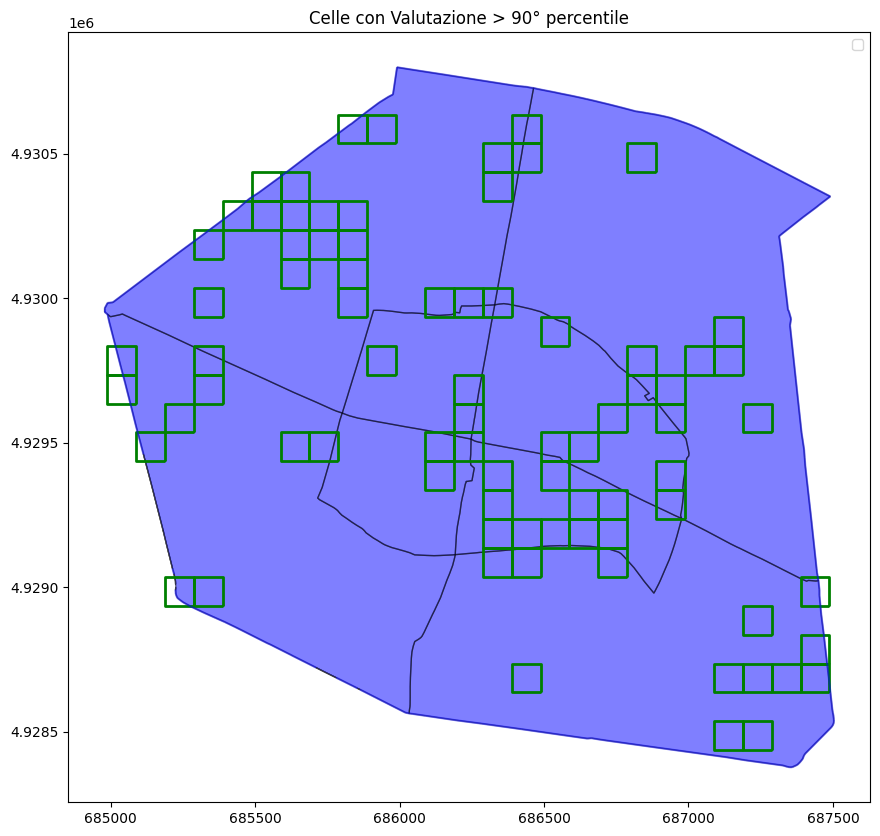

In [57]:
best_grid = best_grid_bayesian.copy() # Usa la griglia trovata con bayesian optimization
# best_grid = best_grid_gs.copy()  # Usa la griglia trovata con grid search

threshold = best_grid["Valutazione"].quantile(0.90)  # Soglia per le celle migliori
celle_migliori_bayesian = best_grid[best_grid["Valutazione"] >= threshold]

# Visualizza le celle migliori
ax = city_center_df.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(12,10))
celle_migliori_bayesian.plot(ax=ax, facecolor='none', edgecolor='green', linewidth=2, label="Celle Migliori")
plt.title("Celle con Valutazione > 90° percentile")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


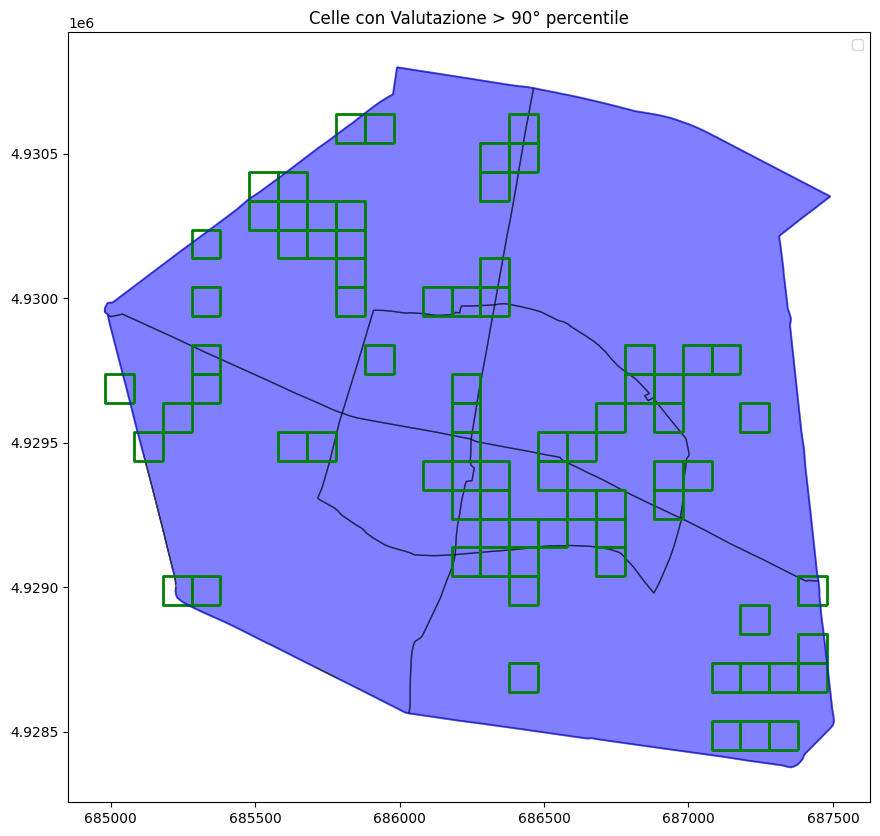

In [58]:
# best_grid = best_grid_bayesian.copy() # Usa la griglia trovata con bayesian optimization
best_grid = best_grid_gs.copy()  # Usa la griglia trovata con grid search

threshold = best_grid["Valutazione"].quantile(0.90)  # Soglia per le celle migliori
celle_migliori_gs = best_grid[best_grid["Valutazione"] >= threshold]

# Visualizza le celle migliori
ax = city_center_df.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(12,10))
celle_migliori_gs.plot(ax=ax, facecolor='none', edgecolor='green', linewidth=2, label="Celle Migliori")
plt.title("Celle con Valutazione > 90° percentile")
plt.legend()
plt.show()

In [ ]:
# save the best grid with the highest score
best_grid_gs.to_file("Data/outputs_gpkg/best_grid_gs.gpkg", layer="best_grid", driver="GPKG")
# save the best grid with the highest score from bayesian optimization
best_grid_bayesian.to_file("Data/outputs_gpkg/best_grid_bayesian.gpkg", layer="best_grid_bayesian", driver="GPKG")


In [ ]:
# save the best cells with the highest score
celle_migliori_gs.to_file("Data/outputs_gpkg/celle_migliori_gs.gpkg", layer="celle_migliori", driver="GPKG")

# save the best cells with the highest score from bayesian optimization
celle_migliori_bayesian.to_file("Data/outputs_gpkg/celle_migliori_bayesian.gpkg", layer="celle_migliori_bayesian", driver="GPKG")

### Interactive Map of the best cells with both methods

In [ ]:
m = folium.Map(location=[44.4949, 11.3426], zoom_start=13, tiles=None)

layers_OSM = [
    "037006_Bologna-2025-03-12T15Z — lines",
    "037006_Bologna-2025-03-12T15Z — multilinestrings",
    "037006_Bologna-2025-03-12T15Z — multipolygons",
    "037006_Bologna-2025-03-12T15Z — points",
    "037006_Bologna-2025-03-12T15Z — other_relations"
]

layers_map = set(layers) - set(layers_OSM)

layers.append("celle_migliori_bayesian")
layers.append("celle_migliori_gs")
layers_celle = ["celle_migliori_bayesian", "celle_migliori_gs"]

for layer_name in layers:
    try:
        if layer_name in layers_celle:
            gdf = gpd.read_file("Data/" + layer_name + ".gpkg")
            if gdf.crs != "EPSG:4326":
                gdf = gdf.to_crs(epsg=4326)
        else:
            gdf = gpd.read_file(gpkg_path, layer=layer_name)

        if gdf.empty or 'geometry' not in gdf.columns:
            continue

        for col in gdf.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
            gdf[col] = gdf[col].astype(str)

        if layer_name in layers_OSM:
            folium.TileLayer('OpenStreetMap').add_to(m)
            continue

        fg = folium.FeatureGroup(name=layer_name, show=False)
        popup_fields = [col for col in gdf.columns if col != 'geometry' and not col.lower().endswith('id')]

        # Definisci lo stile in base al nome layer
        if layer_name == "celle_migliori_bayesian":
            color = "red"
        elif layer_name == "celle_migliori_gs":
            color = "green"
        else:
            color = "blue"  # default o altro

        folium.GeoJson(
            gdf,
            name=layer_name,
            popup=folium.GeoJsonPopup(fields=popup_fields),
            tooltip=folium.GeoJsonTooltip(
                fields=popup_fields,
                aliases=[f"{f}: " for f in popup_fields],
                localize=True,
                sticky=True,
                labels=True,
                style="background-color: white; border: 1px solid black; padding: 5px;"
            ),
            style_function=lambda x, col=color: {
                "color": col,
                "weight": 2,
                "fillColor": col,
                "fillOpacity": 0.3
            }
        ).add_to(fg)

        fg.add_to(m)

    except Exception as e:
        print(f"Error with layer {layer_name}: {e}")


folium.LayerControl(collapsed=False).add_to(m)
m.save("maps/mappa_bologna_interattiva_con_celle_migliori.html")


In [ ]:
# zippa il file mappa_bologna_interattiva_con_celle_migliori.html
zip_path = "maps/mappa_bologna_interattiva_con_celle_migliori.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write("mappa_bologna_interattiva_con_celle_migliori.html", arcname="mappa_bologna_interattiva_con_celle_migliori.html")